#### Analytical Function Estimator: Reinforcement Learning


In [1]:
from packages.func import func
import numpy as np
import random
from math import cos
import matplotlib.pyplot as plt

In [2]:

def get_eval_points():
    num_samples = 100
    start = -10
    end = 10
    step = (end - start)/num_samples
    return np.arange(start, end, step)

def generate_sample(f: func) -> (np.array, np.array):
  
    eval_points = get_eval_points()
    # Modeling noise
    mean = 0
    std = np.random.uniform(0.1, 0.3, 1)
    noise = np.random.normal(mean, std, size=len(eval_points))

    X = f.eval(eval_points)
    X = X + noise

    return np.array(X)

In [3]:
# State Representation
def initial_state():
    return func("0")  # Empty tree to start with

"""
Action Space: All possible operations on the tree that should be made by the
agent. Make sure to implement them in the class. 
"""

# Environment Simulation
def step(state, action):
    # Apply action to the state
    if action == "add_const":
        new_state = state + func("1")
    elif action == "add_x":
        new_state = state + func("x")
    elif action == "del_x":
        new_state = state - func("x")
    elif action == "del_const":
        new_state = state - func("1")

    return new_state

In [4]:
# TODO: include the fourier analysis as a reward

def reward(state: func, data: np.array):
    
    # Evaluate the current state and return a reward
    try:
        eval_state = state.eval(get_eval_points())
        diff = eval_state - data
        squared_sum = 0
        for d in diff:
            squared_sum += np.square(d)
        error = np.sqrt(squared_sum)
        print("Error ", error)
        #complexity_penalty = state.get_size() # Simple complexity measure
        #print("Compl Penalty ", complexity_penalty)
        
        return -0.1*error
    
    except:
        print("We had a problem fellas")
        return -float('inf')  # Penalize invalid states


In [5]:
f = func("x + 3")
data = generate_sample(f)
state = initial_state()

actions = ["add_const", "add_x", "del_x", "del_const"]

Error  58.64115178310994
We chose  add_const
Rewarded value:  -5.864115178310994
current state  (0)+(1)
Good accuracy achieved with fct  (0)+(1)


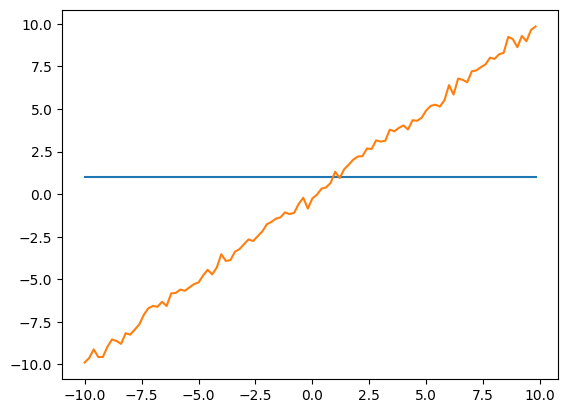

In [6]:

# Q-Learning
Q = {}
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1  # Exploration rate

f = func("x")
data = generate_sample(f)

def q_learning_episode():
    max_iter = 0
    state = initial_state()
    while max_iter < 300:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Explore
        else:
            q_values = [Q.get((state, a), 0) for a in actions]
            max_q = max(q_values)
            action = actions[q_values.index(max_q)]  # Exploit

        new_state = step(state, action)
        reward_value = reward(new_state, data)
        print("We chose ", action)
        print("Rewarded value: ", reward_value)
        print("current state ", new_state.get_value())

        if reward_value > -10:
            print("Good accuracy achieved with fct ", new_state.get_value())
            X_est = new_state.eval(get_eval_points())
            #print(get_eval_points())
            plt.plot(get_eval_points(), X_est)
            plt.plot(get_eval_points(), data)
            plt.show()
            return True

        # Update Q-value
        old_q = Q.get((state, action), 0)
        max_future_q = max([Q.get((new_state, a), 0) for a in actions])
        new_q = (1 - learning_rate) * old_q + learning_rate * (reward_value + discount_factor * max_future_q)
        Q[(state, action)] = new_q

        state = new_state

        max_iter += 1
        print("\n\n")
       

# Run episodes
for _ in range(100):
    if(q_learning_episode()):
        break
